In [270]:
# Importing all the necessary packages

    # for data ext 
import requests
import json
import pandas as pd
from pandas import json_normalize
# for ploting
import matplotlib.pyplot as plt

## Data Extraction

In [229]:
# Function to extract data from The Graph using api

def extract(skip_val):
    url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2"
    query = """query swaps{
      swaps(first: 1000,skip:"""+str(skip_val)+""",orderBy: timestamp, orderDirection: desc, where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}) {
        pair{
        id
        }
        timestamp
        amount0In
        amount1In
        amount0Out
        amount1Out
        pair {
          token0 {
            symbol
            totalLiquidity
          }
          token1 {
            symbol
            totalLiquidity
          }

        }
        amountUSD

      }
    }

    """
    
    read = requests.post(url, json={'query':query})
    json_data = json.loads(read.text)
    
    # Normalising the json data, such that it can be converted into a pandas data frame.
    json_data = json_data['data']
    json_data = json_data['swaps']
    df = json_normalize(json_data)
    return df

In [230]:
# Extracting the first 1000 records
df = extract(0)

# Extracting another 4000 records, a total of 5000 records
for i in range(1000,5000,1000):
    df = df.append(extract(i))

In [231]:
df.head(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
0,0,96.835321204457406064,0.85149020212597836,0,1628.518499917342558713879766713784,1624393564,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
1,0,2000,17.570375489285086351,0,33604.40722845327124963292497204729,1624393512,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
2,13.418320787154540906,0,0,0.117075645138833767,223.9164963630870929040694671425358,1624393504,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
3,41.478342128965055039,0,0,0.361909575286517839,692.2357590472963492203491149267196,1624393384,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
4,484.986587354317518891,0,0,4.232599728671334556,8053.611134229547173837080539572276,1624392790,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471


## Data Manipulation

In [232]:
# Reseting the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.tail(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
4995,0.655304880377307541,0,0,0.006283549200204961,16.33659764851578855131400765828159,1623283606,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
4996,1301.63570869552939008,0,0,12.487736096281358153,32473.89493220231040952818896310793,1623283598,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
4997,0,21.769673103818988692,0.21,0,545.9766608503906748330268883862568,1623283598,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
4998,0.992894823161866686,0,0,0.009530979661320077,24.8287863647916355839300397435015,1623282603,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471
4999,1.880480723996769352,0,0,0.018051101703841915,47.02005534256999440893623409316861,1623282569,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471


In [233]:
# Converting timestamp into Date Time format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [235]:
# Creating a column for side(Buy/Sell)
    # amount0In and amount0Out -> represents UNI
    # amount1In and amount1Out -> represents WETH
        # if amount0In is 0 and amount0Out has some value, it means that UNI is sent out of the wallet, i.e. Sell
        # if amount0Out is 0 and amount0In has some value. it means that UNI is recived to the wallet, i.e. Buy  

df['side'] = ["Sell" if float(x)==0 else "Buy" for x in df['amount0In']]

In [236]:
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side
0,0,96.835321204457406064,0.85149020212597836,0,1628.518499917342558713879766713784,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471,Sell
1,0,2000,17.570375489285086351,0,33604.40722845327124963292497204729,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471,Sell


In [237]:
# converting
    # amount0In
    # amount1In
    # pair.token0.symbol
        # into "Base curency quantity traded" format

# Eg
    # amount0In/amount0Out UNI
    # 115.82195 UNI    -> rounded off to 5 decimals  -> it is not appropriate to round off a digital currency
    
b_c = df['amount0In']+df['amount0Out']
b_c = [round(float(i),5) for i in b_c]
b_c = [(str(i)+" "+str(df['pair.token0.symbol'][0])) for i in b_c]
df["baseCurrency"] = b_c

q_o = df['amount1In']+df['amount1Out']
q_o = [round(float(i),5) for i in q_o]
q_o = [(str(i)+" "+str(df['pair.token1.symbol'][0])) for i in q_o]
df["quoteCurrency"] = q_o

df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency
0,0,96.835321204457406064,0.85149020212597836,0,1628.518499917342558713879766713784,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471,Sell,96.83532 UNI,0.85149 WETH
1,0,2000,17.570375489285086351,0,33604.40722845327124963292497204729,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2347780.061913636929651532,WETH,747818.353263258768267471,Sell,2000.0 UNI,17.57038 WETH


In [238]:
# Creating a new column for total liquidity
df['pair.token1.totalLiquidity'] = pd.to_numeric(df['pair.token1.totalLiquidity'])
df['pair.token0.totalLiquidity'] = pd.to_numeric(df['pair.token0.totalLiquidity'])
df['totalLiquidity'] = round(df['pair.token1.totalLiquidity']+df['pair.token0.totalLiquidity'],5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,0,96.835321204457406064,0.85149020212597836,0,1628.518499917342558713879766713784,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.347780e+06,WETH,747818.353263,Sell,96.83532 UNI,0.85149 WETH,3.095598e+06
1,0,2000,17.570375489285086351,0,33604.40722845327124963292497204729,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.347780e+06,WETH,747818.353263,Sell,2000.0 UNI,17.57038 WETH,3.095598e+06


In [239]:
# Rounding off USD to 5 decimals (Not to be done for real time works)
df['amountUSD'] =round (pd.to_numeric(df['amountUSD']),5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,0,96.835321204457406064,0.85149020212597836,0,1628.51850,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.347780e+06,WETH,747818.353263,Sell,96.83532 UNI,0.85149 WETH,3.095598e+06
1,0,2000,17.570375489285086351,0,33604.40723,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.347780e+06,WETH,747818.353263,Sell,2000.0 UNI,17.57038 WETH,3.095598e+06


In [240]:
# Removing excess columns
df.drop(['amount0In','amount0Out','amount1In','amount1Out','pair.token0.symbol','pair.token1.symbol','pair.token1.totalLiquidity','pair.token0.totalLiquidity'],axis=1,inplace=True)
df.head(2)

,amountUSD,timestamp,pair.id,side,baseCurrency,quoteCurrency,totalLiquidity
0,1628.51850,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,Sell,96.83532 UNI,0.85149 WETH,3.095598e+06
1,33604.40723,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,Sell,2000.0 UNI,17.57038 WETH,3.095598e+06


In [241]:
# Re-naming columns
df.rename({'amountUSD': 'volumeUSD', 'pair.id': 'poolId'}, axis=1, inplace=True)
df.head(2)

,volumeUSD,timestamp,poolId,side,baseCurrency,quoteCurrency,totalLiquidity
0,1628.51850,2021-06-22 20:26:04,0xd3d2e2692501a5c9ca623199d38826e513033a17,Sell,96.83532 UNI,0.85149 WETH,3.095598e+06
1,33604.40723,2021-06-22 20:25:12,0xd3d2e2692501a5c9ca623199d38826e513033a17,Sell,2000.0 UNI,17.57038 WETH,3.095598e+06


In [242]:
# Re-arranging the columns
df = df[['timestamp', 'side', 'baseCurrency', 'quoteCurrency', 'volumeUSD','totalLiquidity','poolId']]
df.head()

,timestamp,side,baseCurrency,quoteCurrency,volumeUSD,totalLiquidity,poolId
0,2021-06-22 20:26:04,Sell,96.83532 UNI,0.85149 WETH,1628.51850,3.095598e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
1,2021-06-22 20:25:12,Sell,2000.0 UNI,17.57038 WETH,33604.40723,3.095598e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
2,2021-06-22 20:25:04,Buy,13.41832 UNI,0.11708 WETH,223.91650,3.095598e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
3,2021-06-22 20:23:04,Buy,41.47834 UNI,0.36191 WETH,692.23576,3.095598e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
4,2021-06-22 20:13:10,Buy,484.98659 UNI,4.2326 WETH,8053.61113,3.095598e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17


## Initial Analysis

In [244]:
# Checking the range of dates
start_date = df.iloc[0]['timestamp']
end_date = df.iloc[-1]['timestamp']
print("The Data ranges between the date "+str(end_date)+" to "+str(start_date))

The Data ranges between the date 2021-06-09 23:49:29 to 2021-06-22 20:26:04


In [253]:
# Number of Buy and Sell transactions in the given period
df['side'].value_counts()

Buy     2906
Sell    2094
Name: side, dtype: int64

Text(0.5,1,'Number of transactions done on each day')

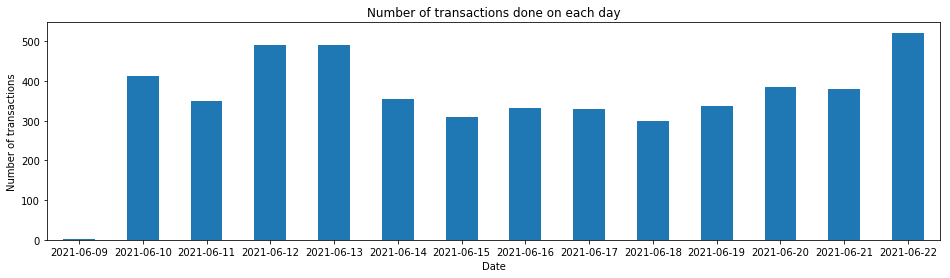

In [288]:
fig, axs = plt.subplots(figsize=(16, 4))

df.groupby(df["timestamp"].dt.date)["timestamp"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Date")
plt.ylabel("Number of transactions")
plt.title("Number of transactions done on each day")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Su

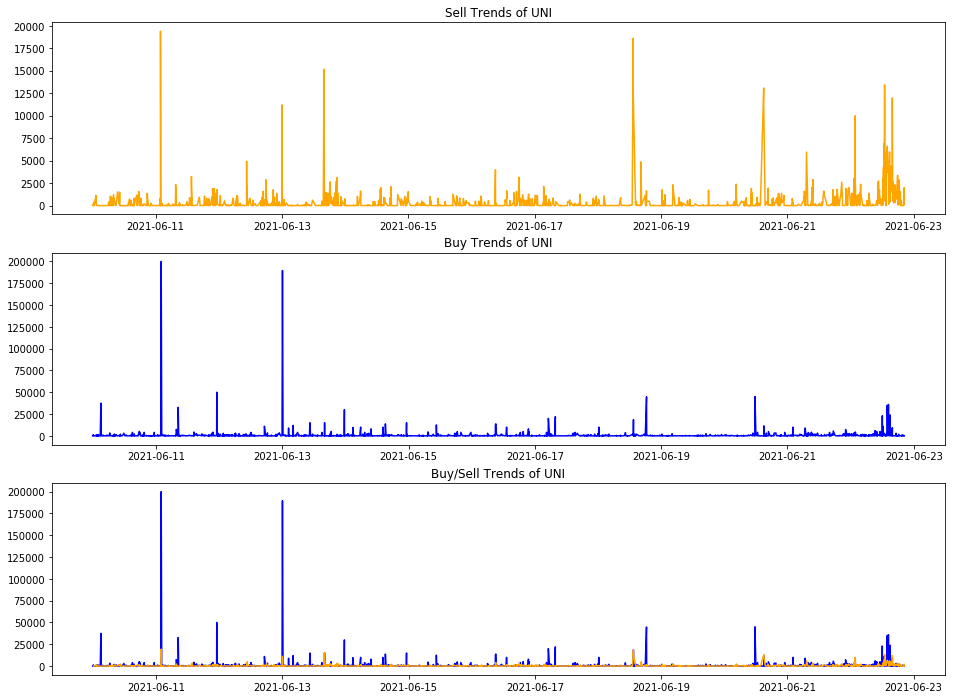

In [321]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['baseCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
UNI_ = df[['timestamp','side']]
UNI_['UNI_QTY'] = b_c
UNI_.head(5)

uni_sell = UNI_[UNI_['side']=='Sell']
uni_buy = UNI_[UNI_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of UNI")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of UNI")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of UNI")
plt.show() 


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Su

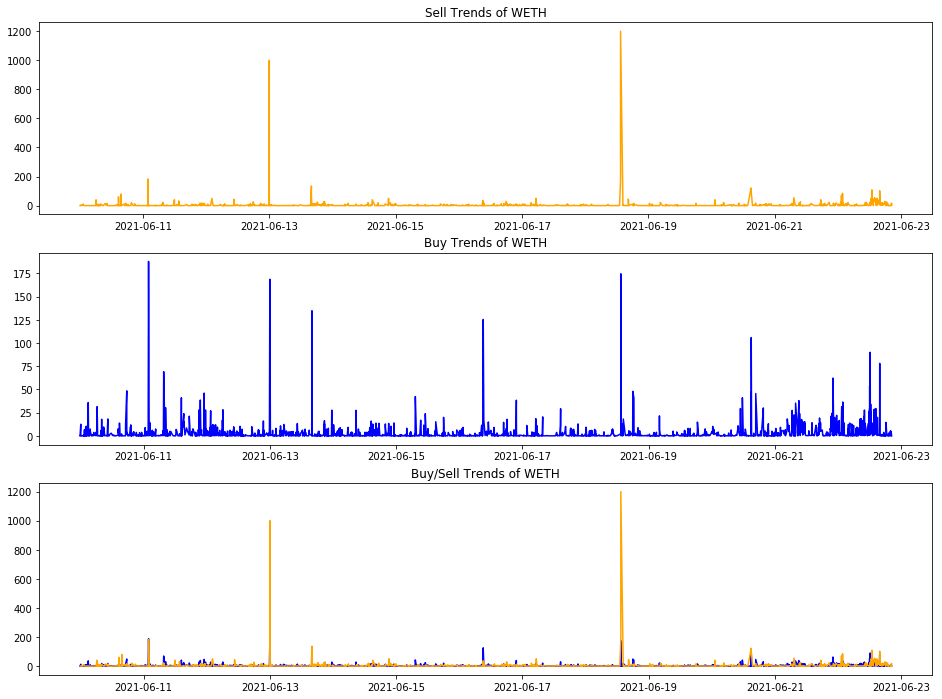

In [322]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['quoteCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
WETH_ = df[['timestamp','side']]
WETH_['UNI_QTY'] = b_c
WETH_.head(5)

weth_sell = WETH_[WETH_['side']=='Sell']
weth_buy = WETH_[WETH_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of WETH")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of WETH")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of WETH")
plt.show() 